In [24]:

import pickle
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
# # Load the augmented data from the saved file
# data = np.load('../data/external/coral_augmented_combined.npz')

# # Access the arrays from the loaded data
# X_train = data['X_train']
# y_train = data['y_train']
# X_test = data['X_test']
# y_test = data['y_test']
# X_valid = data['X_valid']
# y_valid = data['y_valid']

# # Combine X_train and X_valid
# X_train = np.concatenate((X_train, X_valid), axis=0)

# # Combine y_train and y_valid
# y_train = np.concatenate((y_train, y_valid), axis=0)

# # Print the shapes to verify
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")

In [3]:
def extract_hog_features(images):
    features = []
    for image in images:
        # Specify channel_axis=2 to indicate that channels are along the third axis (for color images)
        fd, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True, channel_axis=2)
        features.append(fd)
    return np.array(features)

X_train_features = extract_hog_features(X_train)
X_test_features = extract_hog_features(X_test)
print(f"X_train_features Shape: {X_train_features.shape}")
print(f"X_test_features Shape: {X_test_features.shape}")

/var/folders/ph/_s861md14q5c2ykky6q5pgd80000gn/T/ipykernel_39372/3562830453.py:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True, channel_axis=2)


X_train_features Shape: (5752, 26244)
X_test_features Shape: (1440, 26244)


In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import pickle
from sklearn.metrics import classification_report

#defining support vector machine parameters
parameters = {
    'kernel':['linear','poly','rbf','sigmoid'], 
    'gamma':['scale','auto'],
    'C':np.linspace(0.01,.75,20)
    }

#defining randomized grid search cv
clf = RandomizedSearchCV(SVC(),param_distributions=parameters,random_state=99,verbose=3)
#fitting to LDA transformed training data 
search_lda = clf.fit(X_train_features, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.438421052631579, gamma=scale, kernel=sigmoid;, score=0.862 total time=35.2min
[CV 2/5] END C=0.438421052631579, gamma=scale, kernel=sigmoid;, score=0.862 total time=34.6min
[CV 3/5] END C=0.438421052631579, gamma=scale, kernel=sigmoid;, score=0.863 total time=35.5min
[CV 4/5] END C=0.438421052631579, gamma=scale, kernel=sigmoid;, score=0.863 total time=35.3min
[CV 5/5] END C=0.438421052631579, gamma=scale, kernel=sigmoid;, score=0.863 total time=19.5min
[CV 1/5] END C=0.20473684210526316, gamma=auto, kernel=rbf;, score=0.862 total time= 1.9min
[CV 2/5] END C=0.20473684210526316, gamma=auto, kernel=rbf;, score=0.862 total time= 1.8min
[CV 3/5] END C=0.20473684210526316, gamma=auto, kernel=rbf;, score=0.863 total time= 1.8min
[CV 4/5] END C=0.20473684210526316, gamma=auto, kernel=rbf;, score=0.863 total time= 1.9min
[CV 5/5] END C=0.20473684210526316, gamma=auto, kernel=rbf;, score=0.863 total time= 1.9min
[CV 

In [6]:
#dumping randomized search cv into pickle file 
with open('..data/exteral/svm_randomized_search_cv.pkl','wb') as f:
  pickle.dump(search_lda,f)

FileNotFoundError: [Errno 2] No such file or directory: '..data/exteral/svm_randomized_search_cv.pkl'

In [7]:
#best model
search_lda.best_params_

{'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0.438421052631579}

In [4]:
# import matplotlib.pyplot as plt

# # Display some sample HOG features from X_train_features
# num_samples = 5  # Number of samples to display

# for i in range(num_samples):
#     plt.figure(figsize=(8, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(X_train[i])  # Display the original image
#     plt.title("Original Image")

#     plt.subplot(1, 2, 2)
#     hog_feature = X_train_features[i]
#     plt.plot(hog_feature, color='black')  # Display the HOG feature as a 1D vector
#     plt.title("HOG Feature (1D)")
#     plt.show()

# # Display some sample HOG features from X_test_features
# for i in range(num_samples):
#     plt.figure(figsize=(8, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(X_test[i])  # Display the original image
#     plt.title("Original Image")

#     plt.subplot(1, 2, 2)
#     hog_feature = X_test_features[i]
#     plt.plot(hog_feature, color='black')  # Display the HOG feature as a 1D vector
#     plt.title("HOG Feature (1D)")
#     plt.show()


In [9]:
# 3. Training: Train an SVM classifier
svm_classifier = SVC(kernel='sigmoid',gamma='scale', C=0.438421052631579, random_state=42)
svm_classifier.fit(X_train_features, y_train)

SVC(C=0.438421052631579, kernel='sigmoid', random_state=42)

In [10]:
# 5. Testing
y_train_pred = svm_classifier.predict(X_train_features)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

y_test_pred = svm_classifier.predict(X_test_features)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 86.23%
Test Accuracy: 90.00%


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_features)

# Get the class labels
labels = list(set(y_train))

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

# Classification report
report = classification_report(y_test, y_pred, target_names=labels)
print("Classification report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)




Cohen's Kappa: 0.0
Classification report:
                precision    recall  f1-score   support

pseudodiploria       0.00      0.00      0.00       144
          apal       0.90      1.00      0.95      1296

      accuracy                           0.90      1440
     macro avg       0.45      0.50      0.47      1440
  weighted avg       0.81      0.90      0.85      1440

Confusion Matrix:
[[   0  144]
 [   0 1296]]


/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [16]:
from sklearn.metrics import cohen_kappa_score, classification_report

# Step 1: Import necessary libraries and dependencies
import numpy as np
from sklearn.metrics import accuracy_score

# Step 2: Evaluate the model on the test data (replace with your model and test data)
y_true = y_test  # Replace with your true labels
y_pred = svm_classifier.predict(X_test_features)  # Replace with your model predictions

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy of the model is:", accuracy * 100, "%")

# Step 3: Calculate Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_true, y_pred)
print("Cohen's Kappa:", cohen_kappa)

# Step 4: Generate a classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)


Accuracy of the model is: 90.0 %
Cohen's Kappa: 0.0
Classification Report:
                precision    recall  f1-score   support

          apal       0.00      0.00      0.00       144
pseudodiploria       0.90      1.00      0.95      1296

      accuracy                           0.90      1440
     macro avg       0.45      0.50      0.47      1440
  weighted avg       0.81      0.90      0.85      1440



/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [17]:
from sklearn.metrics import cohen_kappa_score, classification_report

# Step 1: Import necessary libraries and dependencies
import numpy as np
from sklearn.metrics import accuracy_score

# Step 2: Evaluate the model on the test data (replace with your model and test data)
y_true = y_train  # Replace with your true labels
y_pred = svm_classifier.predict(X_train_features)  # Replace with your model predictions

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy of the model is:", accuracy * 100, "%")

# Step 3: Calculate Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_true, y_pred)
print("Cohen's Kappa:", cohen_kappa)

# Step 4: Generate a classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

Accuracy of the model is: 86.23087621696801 %
Cohen's Kappa: 0.0
Classification Report:
                precision    recall  f1-score   support

          apal       0.00      0.00      0.00       792
pseudodiploria       0.86      1.00      0.93      4960

      accuracy                           0.86      5752
     macro avg       0.43      0.50      0.46      5752
  weighted avg       0.74      0.86      0.80      5752



/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaiyauddin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [ ]:
# Example image (replace with your own image)
image_to_apply_hog = X_train[0]

# Calculate HOG features for the image
fd, hog_image = hog(image_to_apply_hog, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True, channel_axis=2)

# Rescale HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_to_apply_hog)
plt.title("Original Image")

# Display the HOG image
plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("HOG Features")
plt.show()


### SVM with balanced data

In [2]:
# Load the augmented data from the saved file
data = np.load('../data/external/coral_augmented_combined_bl.npz')

# Access the arrays from the loaded data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
X_valid = data['X_valid']
y_valid = data['y_valid']

# Combine X_train and X_valid
X_train = np.concatenate((X_train, X_valid), axis=0)

# Combine y_train and y_valid
y_train = np.concatenate((y_train, y_valid), axis=0)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (10240, 224, 224, 3)
y_train shape: (10240,)
X_test shape: (2568, 224, 224, 3)
y_test shape: (2568,)


In [8]:
# Define the HOG parameters
orientations = 9
pixels_per_cell = (8, 8)  # Adjusted to 8x8 for larger images
cells_per_block = (2, 2)  # Adjusted to 2x2 for larger images

# Function to extract HOG features from a single color image
def extract_features(img):
    # Compute HOG features for each color channel separately
    hog_features = []
    for channel in range(img.shape[2]):
        features = hog(img[:, :, channel], orientations=orientations,
                        pixels_per_cell=pixels_per_cell,
                        cells_per_block=cells_per_block,
                        visualize=False,
                        transform_sqrt=True,
                        feature_vector=True,
                        block_norm='L2-Hys')
        hog_features.extend(features)
    return np.array(hog_features)

# Apply the extract_features function to all images in X_train and X_test
X_train_features = np.array([extract_features(img) for img in X_train])
X_test_features = np.array([extract_features(img) for img in X_test])

print(f"X_train_features Shape: {X_train_features.shape}")
print(f"X_test_features Shape: {X_test_features.shape}")


X_train_features Shape: (10240, 78732)
X_test_features Shape: (2568, 78732)


In [9]:
import pickle

# Save HOG features to a pickle file
with open('hog_features.pkl', 'wb') as f:
    pickle.dump((X_train_features, X_test_features, y_train, y_test), f)

In [8]:
import pickle

# Load the HOG features from the pickle file
with open('hog_features.pkl', 'rb') as f:
    X_train_features, X_test_features, y_train, y_test = pickle.load(f)


In [9]:
from sklearn.decomposition import PCA

# Number of principal components (you can adjust this based on your needs)
n_components = 100

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit and transform the PCA on the HOG features of the training and test data
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

print(f"X_train_pca Shape: {X_train_pca.shape}")
print(f"X_test_pca Shape: {X_test_pca.shape}")


X_train_pca Shape: (10240, 100)
X_test_pca Shape: (2568, 100)


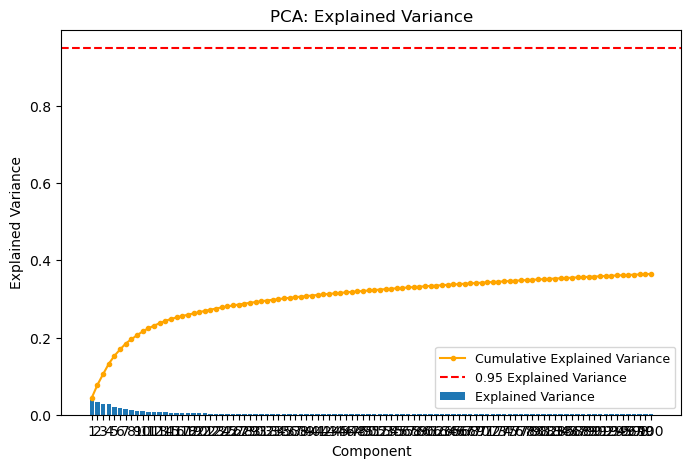

In [10]:
#getting explained variance ratio from the lda model 
evr = pca.explained_variance_ratio_
components = range(1, len(evr) + 1)

#plotting scree plot
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(x = components, height = evr, label = 'Explained Variance');
plt.plot(components, np.cumsum(evr), marker = '.', color = 'orange', label = 'Cumulative Explained Variance')
plt.axhline(y = .95, color = 'r', linestyle = '--', label = '0.95 Explained Variance')
plt.xticks(range(1, len(evr)+1));
plt.title('PCA: Explained Variance');
plt.xlabel('Component');
plt.ylabel('Explained Variance');
plt.legend(fontsize = 9);

NameError: name 'letters' is not defined

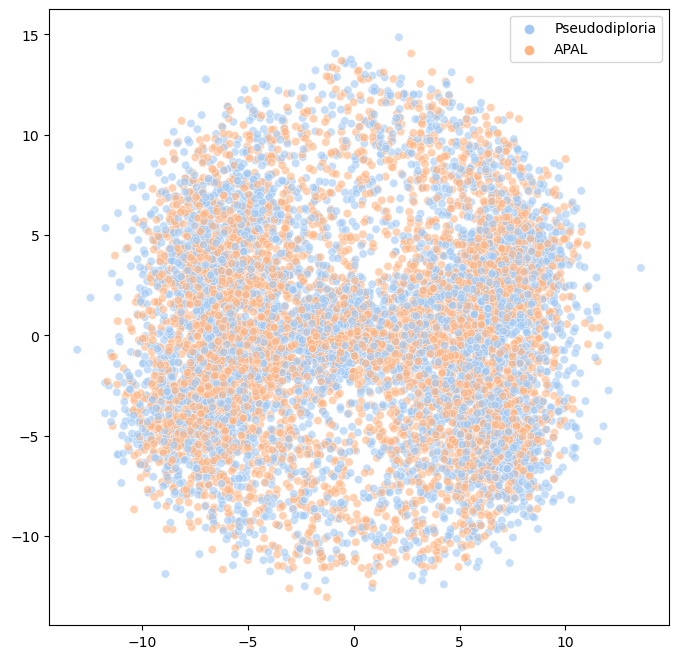

In [12]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (8,8))
ax = sns.scatterplot(x = X_train_pca[:,0], y = X_train_pca[:,1], hue = y_train, palette = 'pastel',alpha=.6);
handler, _ = ax.get_legend_handles_labels();
plt.legend(handler, letters, bbox_to_anchor = (1, 1));
plt.title('2D Embedding of Sign Language Images')
plt.xlabel('Linear Discriminant 1');
plt.ylabel('Linear Discriminant 2');

In [14]:
#defining support vector machine parameters
parameters = {
    'kernel':['linear','poly','rbf','sigmoid'], 
    'gamma':['scale','auto'],
    'C':np.linspace(0.01,.75,5)
    }

#defining randomized grid search cv
clf = RandomizedSearchCV(SVC(),param_distributions=parameters,random_state=99,verbose=3)
#fitting to LDA transformed training data 
search_lda = clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .C=0.565, gamma=scale, kernel=poly;, score=0.622 total time=   6.3s
[CV 2/5] END .C=0.565, gamma=scale, kernel=poly;, score=0.721 total time=   7.1s
[CV 3/5] END .C=0.565, gamma=scale, kernel=poly;, score=0.745 total time=   7.2s
[CV 4/5] END .C=0.565, gamma=scale, kernel=poly;, score=0.724 total time=   8.0s
[CV 5/5] END .C=0.565, gamma=scale, kernel=poly;, score=0.706 total time=   6.8s
[CV 1/5] END .C=0.75, gamma=auto, kernel=linear;, score=0.722 total time=  23.7s
[CV 2/5] END .C=0.75, gamma=auto, kernel=linear;, score=0.710 total time=  23.9s
[CV 3/5] END .C=0.75, gamma=auto, kernel=linear;, score=0.712 total time=  15.9s
[CV 4/5] END .C=0.75, gamma=auto, kernel=linear;, score=0.723 total time=  15.6s
[CV 5/5] END .C=0.75, gamma=auto, kernel=linear;, score=0.718 total time=  16.7s
[CV 1/5] END ..C=0.565, gamma=auto, kernel=poly;, score=0.788 total time=   6.1s
[CV 2/5] END ..C=0.565, gamma=auto, kernel=poly;

In [10]:
#dumping randomized search cv into pickle file 
with open('../data/external/svm_randomized_search_cv.pkl','wb') as f:
  pickle.dump(search_lda,f)

In [15]:
#best model
search_lda.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 0.565}

In [12]:
# 3. Training: Train an SVM classifier
svm_classifier = SVC(kernel='rbf',gamma='scale', C=0.565, random_state=42)
svm_classifier.fit(X_train_pca, y_train)

SVC(C=0.565, random_state=42)

Training Accuracy of the model is: 84.228515625 %
Tesing Accuracy of the model is: 78.50467289719626 %
Testing Classification Report:
                precision    recall  f1-score   support

          APAL       0.78      0.83      0.80      1344
Pseudodiploria       0.80      0.74      0.77      1224

      accuracy                           0.79      2568
     macro avg       0.79      0.78      0.78      2568
  weighted avg       0.79      0.79      0.78      2568



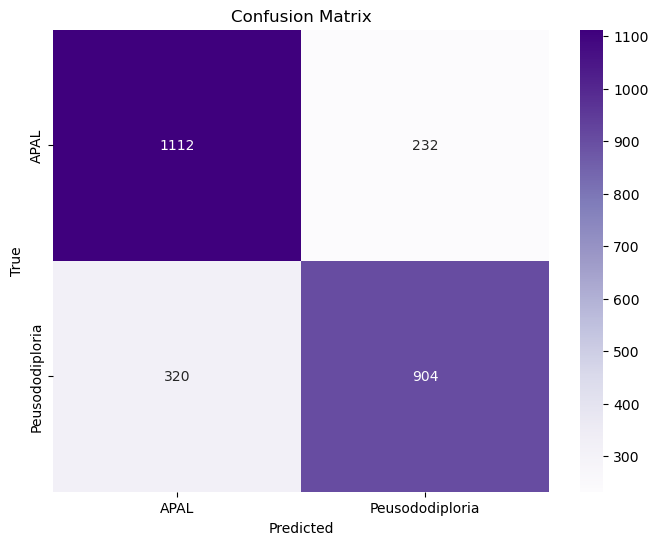

In [33]:
# predicting test
y_pred_test = svm_classifier.predict(X_test_pca)  # Replace with your model predictions
y_pred_train = svm_classifier.predict(X_train_pca)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy of the model is:", accuracy * 100, "%")
accuracy = accuracy_score(y_test, y_pred_test)
print("Tesing Accuracy of the model is:", accuracy * 100, "%")

# Generate a classification report
report = classification_report(y_test, y_pred_test)
print("Testing Classification Report:")
print(report)

# Define class labels (replace these with your actual class labels)
class_labels = ['APAL', 'Peusododiploria']

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Random forest

In [18]:
n_estimators = np.arange(2,22,2)
max_depth = np.arange(2,22,2)
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'max_features': [5, 10, 15]
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier()

# Create a RandomizedSearchCV object
rfc_search = RandomizedSearchCV(estimator = rfc,
                                param_distributions = param_grid,
                                cv = 5, 
                                random_state=42,
                                verbose=3)


# Fit the RandomizedSearchCV object to the data
rfc_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=8, max_features=5, min_samples_leaf=10, min_samples_split=30, n_estimators=2;, score=0.603 total time=   0.1s
[CV 2/5] END max_depth=8, max_features=5, min_samples_leaf=10, min_samples_split=30, n_estimators=2;, score=0.583 total time=   0.1s
[CV 3/5] END max_depth=8, max_features=5, min_samples_leaf=10, min_samples_split=30, n_estimators=2;, score=0.543 total time=   0.0s
[CV 4/5] END max_depth=8, max_features=5, min_samples_leaf=10, min_samples_split=30, n_estimators=2;, score=0.566 total time=   0.1s
[CV 5/5] END max_depth=8, max_features=5, min_samples_leaf=10, min_samples_split=30, n_estimators=2;, score=0.573 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.674 total time=   0.8s
[CV 2/5] END max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.636 total time=   0.9s
[C

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'max_features': [5, 10, 15],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])},
                   random_state=42, verbose=3)

In [19]:
# Print the best hyperparameters
print(rfc_search.best_params_)

{'n_estimators': 18, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 10, 'max_depth': 10}


In [20]:
#dumping randomized search cv into pickle file 
with open('../data/external/rfc_randomized_search_cv.pkl','wb') as f:
  pickle.dump(rfc_search,f)

In [21]:
#defining rfc with best parameters
rfc =RandomForestClassifier(n_estimators=18, min_samples_split=10, min_samples_leaf=15, 
                                   max_features=10, max_depth=10, random_state=42)

rfc.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=15,
                       min_samples_split=10, n_estimators=18, random_state=42)

Training Accuracy of the model is: 86.806640625 %
Tesing Accuracy of the model is: 68.53582554517133 %
Testing Classification Report:
                precision    recall  f1-score   support

          APAL       0.69      0.72      0.70      1344
Pseudodiploria       0.68      0.65      0.66      1224

      accuracy                           0.69      2568
     macro avg       0.68      0.68      0.68      2568
  weighted avg       0.69      0.69      0.69      2568



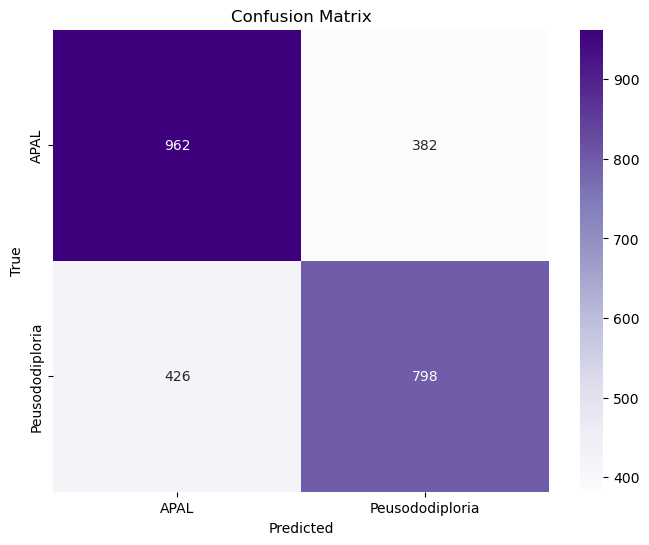

In [22]:
# predicting test
y_pred_test = rfc.predict(X_test_pca)  # Replace with your model predictions
y_pred_train = rfc.predict(X_train_pca)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy of the model is:", accuracy * 100, "%")
accuracy = accuracy_score(y_test, y_pred_test)
print("Tesing Accuracy of the model is:", accuracy * 100, "%")

# Generate a classification report
report = classification_report(y_test, y_pred_test)
print("Testing Classification Report:")
print(report)

# Define class labels (replace these with your actual class labels)
class_labels = ['APAL', 'Peusododiploria']

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

In [26]:
from scipy.stats import uniform
lr = LogisticRegression()

max_iter = range(5000)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = uniform(loc=0, scale=4)
penalty = ["l1", "l2"]
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
    'penalty' : penalty,
}

lr_search = RandomizedSearchCV(estimator = lr,
                                   param_distributions = random_grid,
                                   scoring = 'accuracy',
                                   verbose = 3, 
                                   random_state = 42,
                                  )

lr_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.716 total time=   0.1s
[CV 2/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.708 total time=   0.1s
[CV 3/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.708 total time=   0.1s
[CV 4/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.715 total time=   0.1s
[CV 5/5] END C=1.49816047538945, max_iter=860, penalty=l1, solver=liblinear, warm_start=False;, score=0.716 total time=   0.0s
[CV 1/5] END C=2.3946339367881464, max_iter=466, penalty=l1, solver=liblinear, warm_start=True;, score=0.716 total time=   0.1s
[CV 2/5] END C=2.3946339367881464, max_iter=466, penalty=l1, solver=liblinear, warm_start=True;, score=0.708 total time=   0.1s
[CV 3/5] END C=2.3946339367881464, max_iter=466,

/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=0.22564631610840102, max_iter=2391, penalty=l2, solver=newton-cg, warm_start=False;, score=0.716 total time=   2.7s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=0.22564631610840102, max_iter=2391, penalty=l2, solver=newton-cg, warm_start=False;, score=0.708 total time=   0.7s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.22564631610840102, max_iter=2391, penalty=l2, solver=newton-cg, warm_start=False;, score=0.709 total time=   0.6s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.22564631610840102, max_iter=2391, penalty=l2, solver=newton-cg, warm_start=False;, score=0.715 total time=   0.3s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=0.22564631610840102, max_iter=2391, penalty=l2, solver=newton-cg, warm_start=False;, score=0.716 total time=   0.2s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=0.0031150633640573133, max_iter=1184, penalty=l2, solver=newton-cg, warm_start=False;, score=0.719 total time=   0.2s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=0.0031150633640573133, max_iter=1184, penalty=l2, solver=newton-cg, warm_start=False;, score=0.700 total time=   0.7s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.0031150633640573133, max_iter=1184, penalty=l2, solver=newton-cg, warm_start=False;, score=0.710 total time=   0.5s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.0031150633640573133, max_iter=1184, penalty=l2, solver=newton-cg, warm_start=False;, score=0.711 total time=   0.2s


/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=0.0031150633640573133, max_iter=1184, penalty=l2, solver=newton-cg, warm_start=False;, score=0.713 total time=   0.9s
[CV 1/5] END C=0.028265220878869624, max_iter=2904, penalty=l1, solver=liblinear, warm_start=True;, score=0.732 total time=   0.1s
[CV 2/5] END C=0.028265220878869624, max_iter=2904, penalty=l1, solver=liblinear, warm_start=True;, score=0.704 total time=   0.0s
[CV 3/5] END C=0.028265220878869624, max_iter=2904, penalty=l1, solver=liblinear, warm_start=True;, score=0.711 total time=   0.1s
[CV 4/5] END C=0.028265220878869624, max_iter=2904, penalty=l1, solver=liblinear, warm_start=True;, score=0.718 total time=   0.0s
[CV 5/5] END C=0.028265220878869624, max_iter=2904, penalty=l1, solver=liblinear, warm_start=True;, score=0.715 total time=   0.1s
[CV 1/5] END C=1.599443886861022, max_iter=2047, penalty=l2, solver=liblinear, warm_start=False;, score=0.716 total time=   0.1s
[CV 2/5] END C=1.599443886861022, max_iter=2047, penalty=l2, solver=liblinear, warm

/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sumaiyauddin/

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fd8e1fe9e20>,
                                        'max_iter': range(0, 5000),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear'],
                                        'warm_start': [True, False]},
                   random_state=42, scoring='accuracy', verbose=3)

In [27]:
print('Best hyperparameters:', lr_search.best_params_)
print('Best score:', lr_search.best_score_)

Best hyperparameters: {'C': 0.028265220878869624, 'max_iter': 2904, 'penalty': 'l1', 'solver': 'liblinear', 'warm_start': True}
Best score: 0.71611328125


In [28]:
#dumping randomized search cv into pickle file 
with open('../data/external/lr_randomized_search_cv.pkl','wb') as f:
  pickle.dump(lr_search,f)

In [29]:
lr = LogisticRegression(C=.028265220878869624,
                        max_iter=2904, 
                        penalty="l1", 
                        solver='liblinear',
                        warm_start=True)
lr.fit(X_train_pca, y_train)


LogisticRegression(C=0.028265220878869624, max_iter=2904, penalty='l1',
                   solver='liblinear', warm_start=True)

Training Accuracy of the model is: 73.046875 %
Tesing Accuracy of the model is: 72.85825545171339 %
Testing Classification Report:
                precision    recall  f1-score   support

          APAL       0.73      0.76      0.75      1344
Pseudodiploria       0.72      0.70      0.71      1224

      accuracy                           0.73      2568
     macro avg       0.73      0.73      0.73      2568
  weighted avg       0.73      0.73      0.73      2568



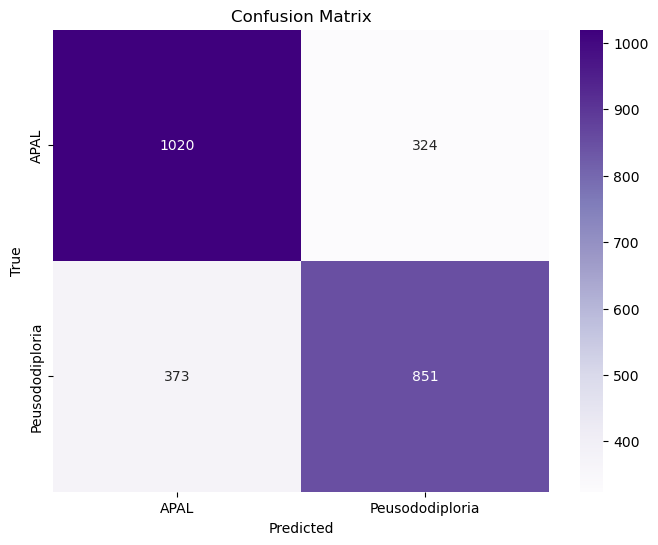

In [30]:
# predicting test
y_pred_test = lr.predict(X_test_pca)  # Replace with your model predictions
y_pred_train = lr.predict(X_train_pca)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy of the model is:", accuracy * 100, "%")
accuracy = accuracy_score(y_test, y_pred_test)
print("Tesing Accuracy of the model is:", accuracy * 100, "%")

# Generate a classification report
report = classification_report(y_test, y_pred_test)
print("Testing Classification Report:")
print(report)

# Define class labels (replace these with your actual class labels)
class_labels = ['APAL', 'Peusododiploria']

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()